 Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
cifar10 = tf.keras.datasets.cifar10


Load and Explore the Dataset

In [ ]:
#Load the CIFAR-10 dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
#Normalize tje pixels values to range between 0 & 1
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


In [ ]:
#Convert the labels to one-hot encoded vectors
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
#Get the class names
class_names=['airplane','automobile','bird','cat','deer','deer','dog','frog','horse','ship','truck']

Data Preprocessing and Augmentation


In [ ]:
#Create data augmentation generator
datagen=ImageDataGenerator(
                       rotation_range=15,
                       width_shift_range=0.1,
                       horizontal_flip=True
                      )
#Fit the generator on the training data
X_gen=datagen.fit(x_train)


Build the CNN model

In [ ]:
#Initialize the CNN model
model=Sequential()
#Add layers
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
#Flatten the output before feeding it to be fully connected layers
model.add(Flatten())

In [ ]:
#Add fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

Model training

In [ ]:
#Define the no of epochs and batch_size
epochs=5
batch_size=128

In [ ]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                   steps_per_epoch=len(x_train) // batch_size,  # Corrected argument name
                   epochs=epochs,
                   validation_data=(x_test, y_test))


Epoch 1/5
390/390 [==============================] - 83s 212ms/step - loss: 0.0550 - accuracy: 0.5924 - val_loss: 0.0495 - val_accuracy: 0.6362
Epoch 2/5
390/390 [==============================] - 81s 209ms/step - loss: 0.0534 - accuracy: 0.6031 - val_loss: 0.0483 - val_accuracy: 0.6478
Epoch 3/5
390/390 [==============================] - 83s 213ms/step - loss: 0.0522 - accuracy: 0.6153 - val_loss: 0.0474 - val_accuracy: 0.6559
Epoch 4/5
390/390 [==============================] - 83s 212ms/step - loss: 0.0512 - accuracy: 0.6254 - val_loss: 0.0461 - val_accuracy: 0.6673
Epoch 5/5
390/390 [==============================] - 84s 215ms/step - loss: 0.0501 - accuracy: 0.6341 - val_loss: 0.0454 - val_accuracy: 0.6716


Model Evaluation and VAlidation

In [ ]:
#Evaluate the model on the test data
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)

313/313 - 3s - loss: 0.0454 - accuracy: 0.6716 - 3s/epoch - 11ms/step


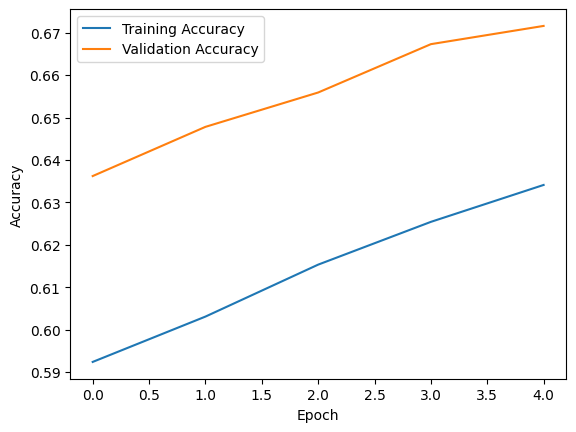

In [ ]:
#Plot the training and validation   accuracy and over epochs
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

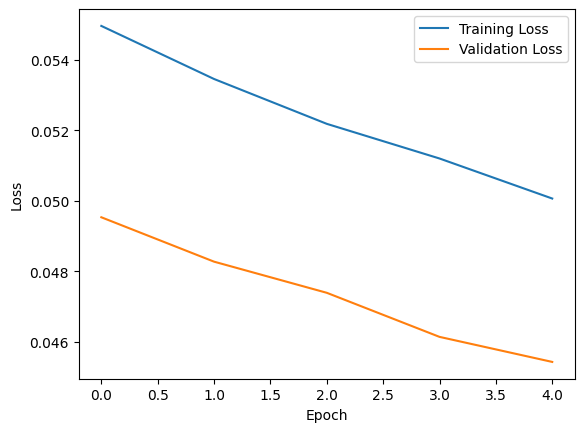

In [ ]:
#plot the training and validation  loss over epochs
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Making the predictions

In [ ]:
#Choose random test image for visualization
num_samples=10
random_indices=np.random.randint(0,len(x_test),num_samples)
random_images=x_test[random_indices]

In [ ]:
#Make predictions
predictions=model.predict(random_images)


1/1 [==============================] - 0s 26ms/step


In [ ]:
import random

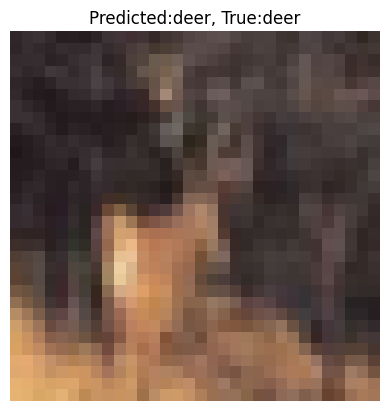

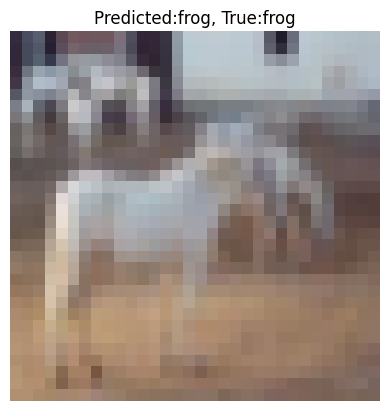

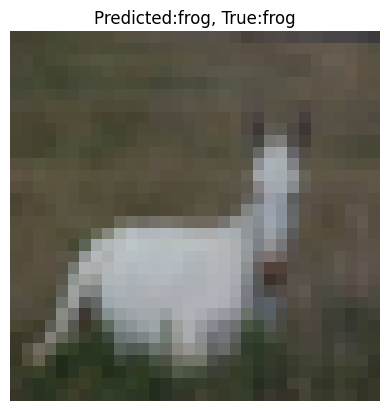

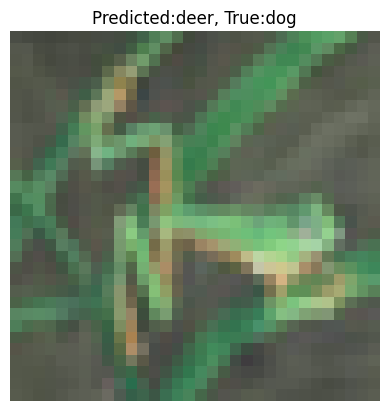

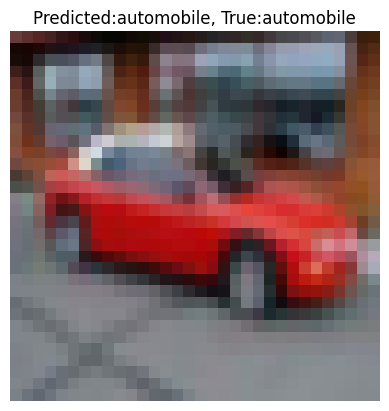

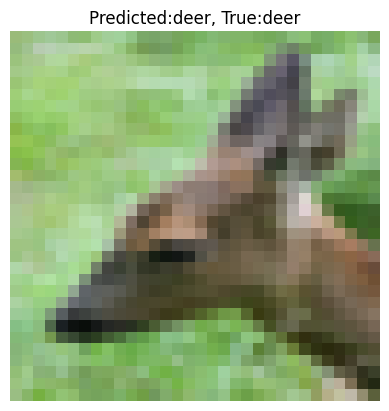

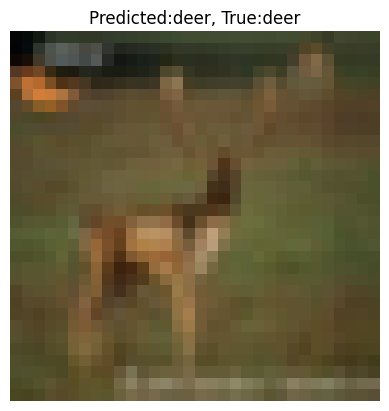

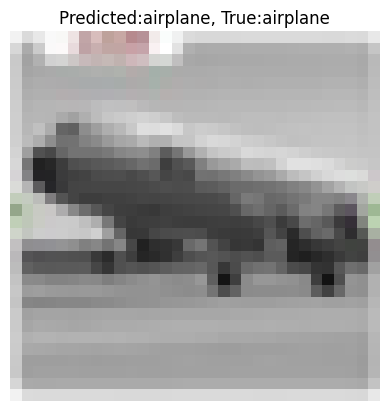

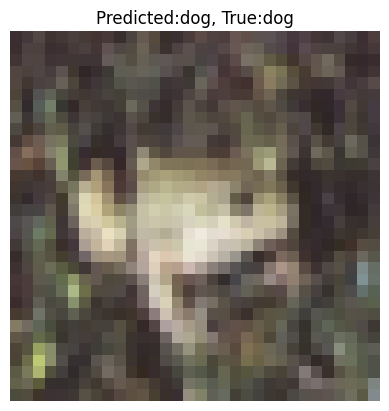

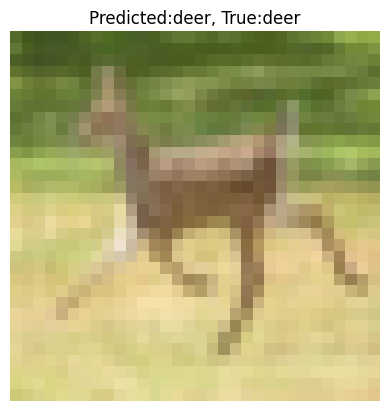

In [ ]:
#Plot the random test images along with thier predicted classes
for i in range(num_samples):
  plt.imshow(random_images[i])
  plt.title(f"Predicted:{class_names[np.argmax(predictions[i])]}, True:{class_names[np.argmax(y_test[random_indices[i]])]}")
  plt.axis('off')
  plt.show()